In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
import math, time
import itertools
from sklearn import preprocessing
import datetime
from operator import itemgetter
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import LSTM
from keras.models import load_model
import keras
import h5py
import requests
import os
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/ALL-SEM-07/ML_DL  

[Errno 2] No such file or directory: '/content/drive/MyDrive/ALL-SEM-07/ML_DL'
/content


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from subprocess import check_output
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import LSTM
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import time #helper libraries
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from numpy import newaxis

In [ ]:
dataset_train  = pd.read_csv("/content/drive/MyDrive/ALL-SEM-07/ML_DL /NSE-TATAGLOBAL.csv")

In [ ]:
training_set = dataset_train.iloc[:, 1:2].values
dataset_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
plt.figure(figsize=(15, 5));
plt.plot(dataset_train['close'], color='red', label='open')
#plt.plot(dataset_train[dataset_train.symbol == 'EQIX'].close.values, color='green', label='close')
#plt.plot(dataset_train[dataset_train.symbol == 'EQIX'].low.values, color='blue', label='low')
#plt.plot(df[df.symbol == 'EQIX'].high.values, color='black', label='high')

KeyError: ignored

<Figure size 1080x360 with 0 Axes>

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
dataset_test = pd.read_csv('/content/drive/MyDrive/ALL-SEM-07/ML_DL /tatatest.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [ ]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
62/62 [==============================] - 20s 139ms/step - loss: 0.0096
Epoch 2/100
62/62 [==============================] - 7s 116ms/step - loss: 0.0031
Epoch 3/100
62/62 [==============================] - 7s 117ms/step - loss: 0.0034
Epoch 4/100
62/62 [==============================] - 7s 116ms/step - loss: 0.0033
Epoch 5/100
62/62 [==============================] - 7s 116ms/step - loss: 0.0024
Epoch 6/100
62/62 [==============================] - 7s 117ms/step - loss: 0.0021
Epoch 7/100
62/62 [==============================] - 8s 129ms/step - loss: 0.0018
Epoch 8/100
62/62 [==============================] - 11s 181ms/step - loss: 0.0020
Epoch 9/100
62/62 [==============================] - 10s 164ms/step - loss: 0.0018
Epoch 10/100
62/62 [==============================] - 9s 138ms/step - loss: 0.0019
Epoch 11/100
62/62 [==============================] - 9s 148ms/step - loss: 0.0021
Epoch 12/100
62/62 [==============================] - 9s 142ms/step - loss: 0.0016
Epoch 13/1

In [ ]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


1/1 [==============================] - 2s 2s/step


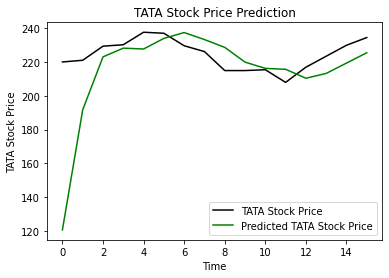

In [ ]:
plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()